In [110]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import urllib.request as urllib

In [830]:
# Change the current directory 
# to specified directory 

#os.chdir("/Users/narongskmala/Documents/github.com/pepsi7959/captcha/src/scb_data")
#image = cv2.imread(os.path.join("/Users/narongskmala/Documents/github.com/pepsi7959/captcha/src/scb_data", "3.png"))

req = urllib.urlopen('https://www.scbeasy.com/online/easynet/page/captcha_image.aspx')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) # 'Load it as it is'

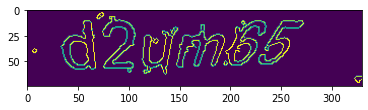

In [831]:
img_h, img_w = image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

dilate = gray
kernel = np.ones((2,2), np.uint8)
dilate = cv2.dilate(gray, kernel, iterations=1)

thresh = dilate
ret,thresh = cv2.threshold(dilate, 125, 255 ,cv2.THRESH_BINARY_INV)

blur = thresh
blur = cv2.GaussianBlur(thresh, (3,3), 1)
#blur = cv2.medianBlur(dilate, 3)
#blur = cv2.bilateralFilter(dilate, 15, 75, 75)


# Defining all the parameters
t_lower = 10 # Lower Threshold
t_upper = 400 # Upper threshold
aperture_size = 3 # Aperture size
L2Gradient = True # Boolean

canny_output = cv2.Canny(blur, t_lower, t_upper,apertureSize = aperture_size, L2gradient = L2Gradient)
contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
plt.imshow(canny_output)
#plt.imshow(canny_output,cmap='gray', vmin = 0, vmax = 255)

[113, 17, 36, 47]
[147, 15, 48, 42]
[228, 11, 45, 43]
[195, 11, 41, 44]
[33, 11, 35, 48]
[74, 7, 33, 55]


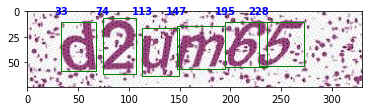

In [832]:
x_min = 0
x_max = 0
images = []
#fig,axes = plt.subplots(nrows = 1, ncols = 6, figsize=(28,28))
for contour in contours:
    # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)
    
    # Don't plot small false positives that aren't text
    if not(w > 20 or h > 20):
        continue
        
    if x_min == 0:
        x_min = x
        
    if x > x_min:
        x_min = x
        
    if x_max == 0 :
        x_max = x
        
    if x_max < x :
        x_max = x  
        
    print([x, y, w, h])

    axe = plt.gca()
    rect = Rectangle((x, y), w, h, linewidth=1, edgecolor='g', facecolor='none')
    axe.add_patch(rect)
    axe.annotate(x, (x, 0), color='b', weight='bold', 
                fontsize=10, ha='center', va='center')
    plt.imshow(image)

    #img = image[y-2:y+h+2, x:x+w]
    #img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
    #axes[i].imshow(img)
    
    
    y_offset = 8
    y_start = y-y_offset
    if y_start <= 0 :
        y_start = y
    y_end = y+h+y_offset
    x_start = x
    x_end = x+w
    images.append((x, image[y_start:y_end, x_start:x_end]))
    
    i = i + 1

33 0
74 33
113 74
147 113
195 147
228 195


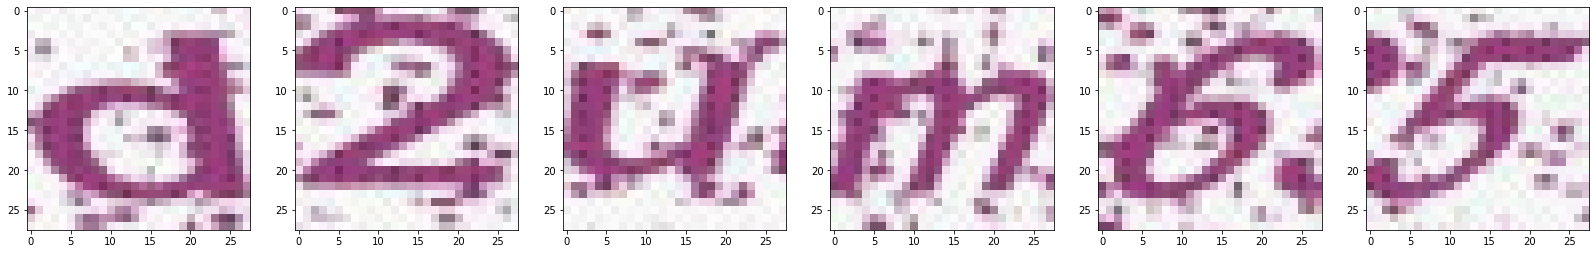

In [833]:
fig,axes = plt.subplots(nrows = 1, ncols = 6, figsize=(28,28))
i = 0
cur_x = 0;
images.sort(key=lambda x: x[0])
for img in images:
    print(img[0], cur_x)
    if (img[0] - cur_x) < 10:
        continue
    cur_x = img[0]
    img = img[1]
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
    axes[i].imshow(img)
    i = i + 1
    if i == 6: break